In [1]:
import numpy as np
import pandas as pd
import twint
import time
from datetime import datetime
from datetime import timedelta, date
import json
from collections import Counter
from ast import literal_eval

In [2]:
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_colwidth', 199)
pd.options.display.float_format = '{:.2f}'.format

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [3]:
import nest_asyncio
nest_asyncio.apply()

In [4]:
week = timedelta(weeks=1)
sixdays = timedelta(days=6)

## Date ranges

### Create Date Ranges

In [5]:
# date_ranges = []


# today_str = date.today().strftime('%d-%m-%Y')
# for date in pd.date_range(start='01-01-2020', end=today_str, freq='1W'):
#     date_tuple = ((date.strftime('%Y-%m-%d'), (date+sixdays).strftime('%Y-%m-%d') ))
    
#     date_ranges.append(date_tuple)
    
# # date_ranges    

# date_ranges_df = pd.DataFrame({'dates': date_ranges})

# date_ranges_df.to_csv(r"Date Ranges.csv", index=False)

### Read Date Ranges

In [6]:
date_ranges_df = pd.read_csv(r"C:/Users/crackcocaine69xxx/Python Stuff/594/Twint/Getting Conspiracy Hashtag Users/Date Ranges.csv")

date_ranges = [literal_eval(x) for x in date_ranges_df['dates'].to_list()]

In [7]:
date_ranges

[('2020-01-05', '2020-01-11'),
 ('2020-01-12', '2020-01-18'),
 ('2020-01-19', '2020-01-25'),
 ('2020-01-26', '2020-02-01'),
 ('2020-02-02', '2020-02-08'),
 ('2020-02-09', '2020-02-15'),
 ('2020-02-16', '2020-02-22'),
 ('2020-02-23', '2020-02-29'),
 ('2020-03-01', '2020-03-07'),
 ('2020-03-08', '2020-03-14'),
 ('2020-03-15', '2020-03-21'),
 ('2020-03-22', '2020-03-28'),
 ('2020-03-29', '2020-04-04'),
 ('2020-04-05', '2020-04-11'),
 ('2020-04-12', '2020-04-18'),
 ('2020-04-19', '2020-04-25'),
 ('2020-04-26', '2020-05-02'),
 ('2020-05-03', '2020-05-09'),
 ('2020-05-10', '2020-05-16'),
 ('2020-05-17', '2020-05-23'),
 ('2020-05-24', '2020-05-30'),
 ('2020-05-31', '2020-06-06'),
 ('2020-06-07', '2020-06-13'),
 ('2020-06-14', '2020-06-20'),
 ('2020-06-21', '2020-06-27'),
 ('2020-06-28', '2020-07-04'),
 ('2020-07-05', '2020-07-11'),
 ('2020-07-12', '2020-07-18'),
 ('2020-07-19', '2020-07-25'),
 ('2020-07-26', '2020-08-01'),
 ('2020-08-02', '2020-08-08'),
 ('2020-08-09', '2020-08-15'),
 ('2020-

## Iteratively get user ids

In [8]:
# test_df = pd.read_csv(f'C:/Users/crackcocaine69xxx/Python Stuff/594/Twint/Twint Output/{date_ranges[0][0]} to {date_ranges[0][1]}.csv')

# del test_df

In [9]:
def get_links_list(series):
    
    local_series = series.apply(literal_eval)
    
    local_series = local_series.explode()
    
    return local_series[pd.notna(local_series)]

In [10]:
user_ids = Counter({})
hashtags = Counter({})
num_tweets = 0

for date_tup in date_ranges:
    try:
        df = pd.read_csv(fr"C:/Users/crackcocaine69xxx/Python Stuff/594/Twint/Twint Output - Links/{date_tup[0]} to {date_tup[1]}_LINKS.csv")
        
        id_count = Counter(df['user_id'].value_counts().to_dict())
        user_ids = user_ids + id_count
        
        
        hashtag_list = get_links_list(df['hashtags'])
        hashtag_count = Counter(hashtag_list.value_counts().to_dict())
        hashtags = hashtag_count + hashtags
        
        num_tweets += len(df)
        
        del df
        
        
    except Exception as e:
        print(Exception)
        print(date_tup)

## Save User IDs to CSV

In [11]:
all_LINK_user_ids = pd.DataFrame.from_dict(user_ids, orient='index', columns=['Num CT Tweets'])

all_LINK_user_ids = all_LINK_user_ids.reset_index()

all_LINK_user_ids = all_LINK_user_ids.rename(columns={'index': 'ID'})

all_LINK_user_ids['Searched'] = 0

In [12]:
all_LINK_user_ids

,ID,Num CT Tweets,Searched
0,18856867,16157,0
1,983527219,15564,0
2,3181140627,7062,0
3,528986496,7437,0
4,564648532,3587,0
...,...,...,...
128013,78607938,1,0
128014,345261628,1,0
128015,1298989066076057600,1,0
128016,1083375427517845504,1,0


In [15]:
all_LINK_user_ids.to_csv(r"C:/Users/crackcocaine69xxx/Python Stuff/594/Twint/Getting Conspiracy Link Users/All Link Users.csv", index=False)

## Save Splits

In [16]:
for mod_10 in list(range(0,10)): #every 10 observations
    
    all_LINK_user_ids.iloc[mod_10::10].to_csv(fr"C:/Users/crackcocaine69xxx/Python Stuff/594/Twint/Getting Conspiracy Link Users/All Link Users - Split {mod_10}.csv")

# Preliminary Analysis

In [1]:
all_LINK_user_ids[ all_LINK_user_ids['Num CT Tweets'] >= 10]

NameError: name 'all_LINK_user_ids' is not defined

<AxesSubplot:>

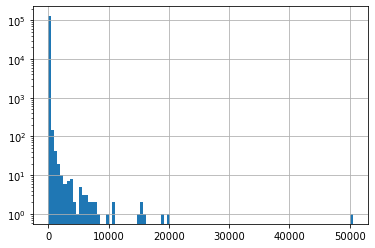

In [27]:
all_LINK_user_ids['Num CT Tweets'].hist(log=True, bins=100)

In [ ]:
# all_LINK_user_ids = list(set(user_ids.keys()))

# pd.Series(all_LINK_user_ids)

# unsearched_user_IDs = pd.DataFrame({'Searched': [0] * (len(all_LINK_user_ids))}, index=all_LINK_user_ids)

# unsearched_user_IDs.index.name = 'ID'

# unsearched_user_IDs.to_csv(r"C:/Users/crackcocaine69xxx/Python Stuff/594/Twint/Getting Conspiracy Hashtag Users/All User IDs.csv")

## Look at most common hashtags and users

In [ ]:
user_ids.most_common()

In [ ]:
hashtags.most_common()

In [ ]:
general_conspiracy_hashtags = [
    'plandemic',
    'scamdemic',
    'covidhoax',
    'nwo',
    'covid1984',
    'plandemia',
    'agenda21',
    'thegreatreset',
    'agenda2030',
    'newworldorder',
    'wakeupamerica',
    'wakeup',
    'openamericanow',
    'firefauci',
    'wwg1wga',
    'qanon',
    'coronahoax'
]

In [ ]:
unsearched_hashtags = hashtags

for hashtag in general_conspiracy_hashtags:
    del unsearched_hashtags[hashtag]

In [ ]:
unsearched_hashtags.most_common()

In [24]:
num_tweets

1302229